# Week 12 Assignment - Simulating Dispersal with Objects

For this week's assignment, we're going to revisit the dispersal simulation that we worked on in Week 8. However, this time, we're going to use object-oriented programming. Specifically, we'll create two kinds of custom objects: `individual`s and `population`s.

Each `individual` will have 3 attributes (an id number, a x-axis position, and a y-position) and 3 methods (a constructor, a method to move its position by 1 unit, and a method to print its coordinate location as x,y).

Each `population` will have 2 attributes (a list of `individual`s in the `population` and a size for its map) and 4 methods (a constructor, a method to move each `individual` in the `population` 1 unit, a method to list the coordinate locations of all `individuals` in the `population`, and a method to display the locations of all `individual`s in the `population` as a scatter plot).

More details are provided below.

In [47]:
# Import necessary modules
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import re

In [62]:
# Define the individual class

class individual:
    # Add a docstring
    id = ""    
    x = 0
    y = 0
    
        
    def __init__(self, id="1", x=0, y=0): # Add default values for id, x, and y
        # Add a docstring        
        
        # The constructor should initialize the 3 attributes based on the values
        # passed as arguments to the constructor.
        self.id = id
        self.x = x
        self.y = y

    
    def move(self, dir): # Add necessary arguments
        # Add a docstring
        
        # Similar to the code from week 8, the code in this method should cause an
        # individual to move one unit up, down, left, or right (chosen randomly).
        # The x and y coordinates for this individual should be modified accordingly.
        
        if dir == 'u': # Test what direction was drawn and update position accordingly
            self.y = self.y + 1
        elif dir == 'd':
            self.y = self.y - 1
        elif dir == 'l':
            self.x = self.x - 1
        elif dir == 'r':
            self.x = self.x + 1    
        else:
            print("Something's wrong! Direction is not u, d, l, or r.")
            

        
    def printLocation(self): # Add necessary arguments
        # Add a docstring
        
        # This method should print a text description of the 
        # individual's id and location (x,y).
        
        print("The individual's id is %s and corresponding x-y location is (%i,%i)." % (self.id,self.x,self.y))

In [63]:
# Define the population class

class population:
    # Add a docstring
    indivList = []
    mapSize = 0
        
    
    def __init__(self,mapSize=12,popSize=12): # Add default values.
        # Add a docstring
                
        # This constructor should create a list of individuals in the population. The 
        # number of individuals should be equal to popSize and each individual should have
        # a unique id. The constructor should also record the mapSize as an attribute.
        for i in range(popSize):
            self.indivList.append(individual(id=str(i)))
        self.mapSize = mapSize
        
    
    def move(self, dirs=["u","d","l","r"]): # Add necessary arguments
        # Add a docstring       
        
        # The code in this method should use a for loop and cause each individual to 
        # move one unit up, down, left, or right. This code should call the .move() method
        # of each individual.
        for indiv in self.indivList:
            movedir = random.choice(dirs)            
            indiv.move(dir=movedir)            

        
    def listLocations(self): # Add necessary arguments
        # Add a docstring
                
        # The code in this method should use a for loop to print a text description of
        # each individual's location. This code should call the .printLocation() method
        # of each individual.
        for indiv in self.indivList:
            indiv.printLocation()

        
    def draw(self): # Add necessary arguments
        # Add a docstring
        xLoc = []
        yLoc = []                        
        
        # The code in this method should use the .plot() method from pyplot to 
        # create a scatterplot showing the locations of all individuals in this
        # population. The length of the x- and y-axes should each by mapSize.
        for indiv in self.indivList:
            xLoc.append(indiv.x)
            yLoc.append(indiv.y)
            
        plt.axis([-self.mapSize,self.mapSize,-self.mapSize,self.mapSize])
        plt.plot(xLoc,xLoc,'o')
        plt.xlabel("x locations")
        plt.ylabel("y locations")

Now that we've created the individual and population classes, let's use them to create populations of individuals and watch them disperse across a map.

The individual's id is 0 and corresponding x-y location is (0,0).
The individual's id is 1 and corresponding x-y location is (-1,1).
The individual's id is 2 and corresponding x-y location is (-2,2).
The individual's id is 3 and corresponding x-y location is (3,-1).
The individual's id is 4 and corresponding x-y location is (-1,3).
The individual's id is 5 and corresponding x-y location is (1,1).
The individual's id is 6 and corresponding x-y location is (1,1).
The individual's id is 7 and corresponding x-y location is (2,0).
The individual's id is 8 and corresponding x-y location is (-3,-3).
The individual's id is 9 and corresponding x-y location is (0,2).
The individual's id is 10 and corresponding x-y location is (-1,1).
The individual's id is 11 and corresponding x-y location is (3,3).


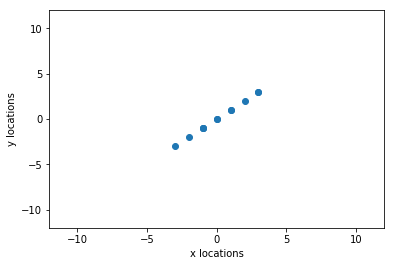

In [64]:
# Create a new population with default values
newPop = population()

# Assign the number of time steps that individuals will move
steps = 12

# Use a for loop to simulate the movement of individuals for the specified number of steps.
for num in range(steps):
    newPop.move()    
    
# Use the .draw() method of the population to draw the map.
newPop.draw()

# Use the .listLocations() method to list the locations of all individuals in the population.
newPop.listLocations()

The individual's id is 0 and corresponding x-y location is (-3,-3).
The individual's id is 1 and corresponding x-y location is (3,-1).
The individual's id is 2 and corresponding x-y location is (6,8).
The individual's id is 3 and corresponding x-y location is (5,3).
The individual's id is 4 and corresponding x-y location is (-4,-6).
The individual's id is 5 and corresponding x-y location is (5,-9).
The individual's id is 6 and corresponding x-y location is (7,-5).
The individual's id is 7 and corresponding x-y location is (8,-8).
The individual's id is 8 and corresponding x-y location is (-16,4).
The individual's id is 9 and corresponding x-y location is (0,6).
The individual's id is 10 and corresponding x-y location is (-2,-4).
The individual's id is 11 and corresponding x-y location is (0,0).
The individual's id is 0 and corresponding x-y location is (-5,-5).
The individual's id is 1 and corresponding x-y location is (6,16).
The individual's id is 2 and corresponding x-y location is 

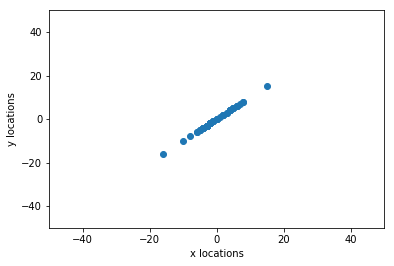

In [65]:
# Try creating a new population, simulating the movement of individuals, drawing a map,
# and listing the location of individuals, but provide non-default values for the mapSize
# and popSize of the population. Also, increase the number of time steps that individuals move.
newPop2 = population(mapSize=50,popSize=50)
steps2 = 50
for num in range(steps2):
    newPop.move()    
newPop2.draw()
newPop2.listLocations()